In [1]:
from distribution import TestDistribution

from RTER import RegressionTree

import numpy as np

from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

from time import time
import os



In [3]:


#distribution_index_vec=[1,2,3,4]





np.random.seed(1)



sample_generator=TestDistribution(2).returnDistribution()
n_test, n_train = 1000,1000
X_train, Y_train = sample_generator.generate(n_train)
X_test, Y_test = sample_generator.generate_true(n_test)



# RTER with cv
time_start=time()
parameters={"truncate_ratio_low":[0,0.1,0.2,0.3 ,0.4], "truncate_ratio_up":[0.5, 0.6,0.7,0.8,0.9,1 ],
           "min_samples_split":[10,20,30,50,100], "max_depth":[1,2,3,4,5],
           "order":[1,2,3]}
cv_model_RTER=GridSearchCV(estimator=RegressionTree(),param_grid=parameters, cv=3, n_jobs=-1)
cv_model_RTER.fit(X_train, Y_train)

RTER_model = cv_model_RTER.best_estimator_
mse_score= - RTER_model.score(X_test, Y_test)
y_hat_RTER = RTER_model.predict(X_test)

time_end=time()

print("RTER: mse {} time {}".format(mse_score,time_end-time_start))


# GBRT
time_start=time()

model_GBRT = GradientBoostingRegressor(n_estimators = 3000)
model_GBRT.fit(X_train, Y_train.ravel())

y_hat=model_GBRT.predict(X_test)
mse_score = MSE(y_hat, Y_test)

time_end=time()

print("GBRT: mse {} time {}".format(mse_score,time_end-time_start))


# RF
time_start=time()

model_RFR = RandomForestRegressor(n_estimators = 200)
model_RFR.fit(X_train, Y_train.ravel())

y_hat=model_RFR.predict(X_test)
mse_score = MSE(y_hat, Y_test)

time_end=time()

print("RF: mse {} time {}".format(mse_score,time_end-time_start))

RTER: mse 4.071855975053281 time 10.549732446670532
GBRT: mse 0.4821705701589648 time 6.842266082763672
RF: mse 0.5650181707537769 time 0.9022226333618164


In [13]:
y_hat_RTER

array([-9.72450707e-02, -1.77193116e-01, -5.94765900e-02, -2.98849551e-01,
       -6.60567240e-02,  2.07202445e-02, -4.20137764e-02, -6.89206446e-02,
        8.66318509e-02, -1.48168710e-01, -1.56201019e-02, -6.00488066e-02,
       -2.80179271e-01, -1.31672632e-01, -1.55655487e-01, -1.33452943e-01,
       -9.96648871e-02, -6.40382623e-02,  4.31141474e-02, -1.27569406e-01,
        2.96011415e-02, -7.73372575e-02, -5.34925669e-02, -9.81358223e-02,
       -1.63761687e-03, -9.20489345e-02, -9.65821166e-02, -1.69383751e-01,
        3.95361862e-02, -1.12140318e-01, -9.00802208e-02, -6.70794547e-02,
       -1.51238263e-01, -1.21471423e-01,  3.50898290e-02, -7.27842526e-02,
       -8.14738723e-02, -3.10661384e-02, -1.56841371e-01, -1.49153035e-01,
       -2.38678320e-01, -6.64081115e-02, -4.69921881e-02, -1.52949726e-01,
       -4.12053703e-02, -7.02733728e-02, -1.08089472e-01, -8.82811134e-02,
       -1.77785044e-02, -1.59449641e-01, -5.38088238e-03, -1.61713069e-02,
       -1.26606520e-01, -

In [5]:
Y_test

array([15.44935695,  7.1463914 ,  4.62990469,  9.3650518 ,  9.84127493,
       10.00273075, 12.88585393,  4.35137529,  5.96127681,  7.66773808,
        5.77238758, 14.71842843,  4.50610248,  4.49164631,  3.95117263,
       14.41701228,  5.44049424,  5.68110512, 13.93166276,  7.24965812,
        8.68068039,  7.7588115 , 11.86489081, 12.52730604,  5.24883548,
        5.79414851, 11.6027951 , 12.1236228 , 16.93245407, 11.46437731,
       11.55355154, 12.33297041, 15.85975737,  2.06769842,  9.30762684,
        6.43896813,  7.49485328,  8.62976614,  8.47182216, 14.6270823 ,
       11.67256232,  8.74105923,  7.51949576,  5.81064118,  9.12694026,
       11.46957823, 14.36511789, 14.46305142, 13.21456262, 13.3675045 ,
        9.99462093,  7.35770834,  9.29190993,  8.772765  , 16.90353492,
        8.26605369, 10.83492941,  9.65932245,  7.3649629 ,  9.89421933,
       13.10460521, 14.20264918, 14.23574482,  7.86879585,  6.60485596,
       11.2932871 , 12.02356491, 13.26868716,  8.23396518,  4.42

In [6]:
X_test

array([[0.84581526, 0.89446604, 0.73081873, ..., 0.86087558, 0.92590301,
        0.06980518],
       [0.54507672, 0.01355775, 0.67062826, ..., 0.55711447, 0.69249026,
        0.53012168],
       [0.68637368, 0.94574351, 0.12885809, ..., 0.46650391, 0.53082395,
        0.58024817],
       ...,
       [0.55031031, 0.69306678, 0.75723956, ..., 0.85510812, 0.15535141,
        0.59723653],
       [0.0278884 , 0.14104428, 0.076457  , ..., 0.91982004, 0.68050318,
        0.10096337],
       [0.41993117, 0.05935548, 0.91228409, ..., 0.8598144 , 0.00272391,
        0.51421236]])

In [14]:
cv_model_RTER.best_params_

{'max_depth': 1,
 'min_samples_split': 100,
 'order': 1,
 'truncate_ratio_low': 0.3,
 'truncate_ratio_up': 0.8}

In [6]:
import matplotlib.pyplot as plt

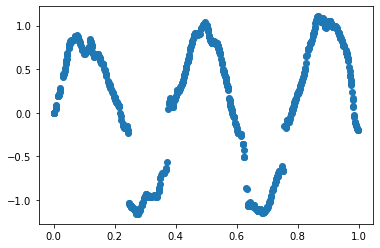

In [7]:
plt.scatter(X_test.ravel(), y_hat_RTER)